# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Gathering, Exploring the data

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [5]:
#Checking for missing values:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Modifying the data

In [6]:
#Dropping car name:
data=data.drop(['Car_Name'],axis=1)

In [7]:
#Adding additional column:
data['Current_year']=2021

In [8]:
data['NR_Years']=data['Current_year']-data['Year']

In [9]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,NR_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [10]:
#Dropping the columns:
data.drop(['Current_year'],axis=1,inplace=True)

In [11]:
#Dropping the column:
data.drop(['Year'],axis=1,inplace=True)

In [12]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NR_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [13]:
#Modifying the dataset: 
data=pd.get_dummies(data,drop_first=True)

In [14]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,NR_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [15]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,NR_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
NR_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# Visualizing the data

<AxesSubplot:>

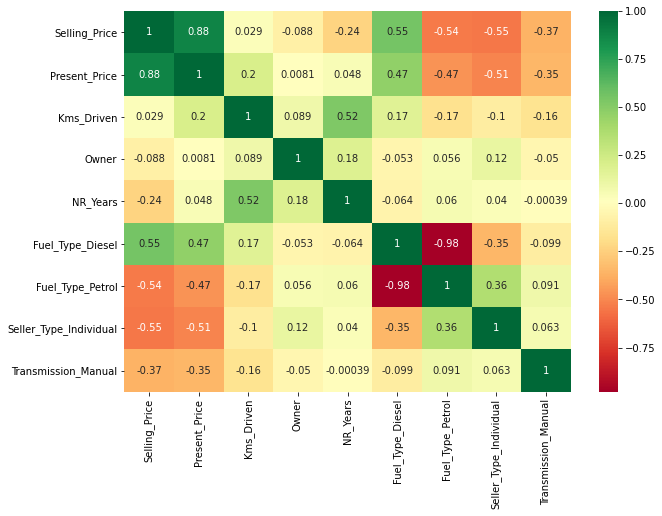

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)

### Spliting the Dependent and independent variables

In [17]:
X=data.iloc[:,1:] #Datafrmae
Y=data.iloc[:,0] #Series

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,NR_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [19]:
#ExtraTreesRegressor is used to get the importance of each feature in Dataset.
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [20]:
#Prints the importance of each feature in the Dataset: 
print(model.feature_importances_)

[0.37732352 0.03998716 0.00043173 0.0758812  0.23245468 0.00679658
 0.12024222 0.14688291]


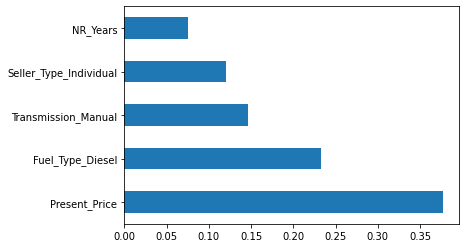

In [21]:
#Plotting the top five important features:
top_features = pd.Series(model.feature_importances_,index=X.columns)
top_features.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
top_features

Present_Price             0.377324
Kms_Driven                0.039987
Owner                     0.000432
NR_Years                  0.075881
Fuel_Type_Diesel          0.232455
Fuel_Type_Petrol          0.006797
Seller_Type_Individual    0.120242
Transmission_Manual       0.146883
dtype: float64

# Generating the model

### Train, Test split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Using RandomForestRegressor

In [24]:
#Importing RandomForest:
rf_random = RandomForestRegressor()

In [25]:
np.linspace(1,100,num=20)

array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ])

In [26]:
#Importing Hyperparameters for the tree:
#number of estimators
n_estimators = [ int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider every split
max_features = ['auto','split']
#Maximum levels in each tree:
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
#Minimum samples required to split a node:
min_samples_split = [2,5,10,15,100]
#Minimum samples required at leaf node:
min_samples_leaf = [1,2,5,10]

In [27]:
#Creating a Dictionary:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'split'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Using RandomizedSearchCV

In [28]:
#RandomizedSearchCV is used to get the best value of parameter from random_grid:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',
                              n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1) #n_jobs= cores in laptop to be used
#Verbose is used to show the deatils when the training is taking place

In [29]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=10, max_features=split, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.2s
[CV] END max_depth=10, max_features=split, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=10, max_features=split, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=10, max_features=split, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=10, max_features=split, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_

C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=25, max_features=split, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=25, max_features=split, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=25, max_features=split, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=25, max_features=split, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=25, max_features=split, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.3s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.3s
[CV] END max_depth=15, max_features=split, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=split, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=split, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END max_depth=15, max_features=split, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.2s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=split, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s


C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [        nan         nan -9.9451806  -5.74799036 -7.40366958         nan
         nan         nan         nan -4.18966997]
  category=UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'split'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
#Predicting with the test dataset:
Predictions = rf_random.predict(X_test)

C:\Users\Danush\anaconda3\envs\Carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


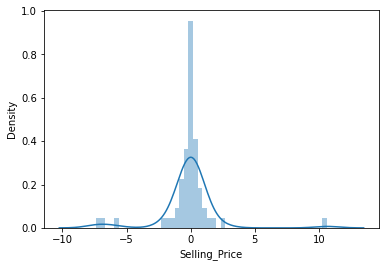

In [31]:
#Plotting the accuracy 
sns.distplot(Y_test-Predictions)
#Since most of the difference is 0 , the model has high accuracy
plt.show()

# Creating a Pickle file 

In [32]:
#Creating a pickle file
file = open('random_forest_regression_model.pkl','wb')
#Dumping the information into the pickle file
pickle.dump(rf_random,file)